In [44]:
!pip install selenium
!pip install webdriver-manager
!pip install plotly

from time import sleep
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re
import numpy as np
from tqdm import tqdm
import datetime
import matplotlib.pyplot as plt

In [40]:
df = pd.read_excel("base_a_traiter.xlsx")
df.drop(columns = ["Unnamed: 0"], inplace = True)
df = df[df["Compagnie"] != "SNCF"]
df["Month"] = df["Date_aller"].apply(lambda date:date.month)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001904AEFAF70>,
      dtype=object)

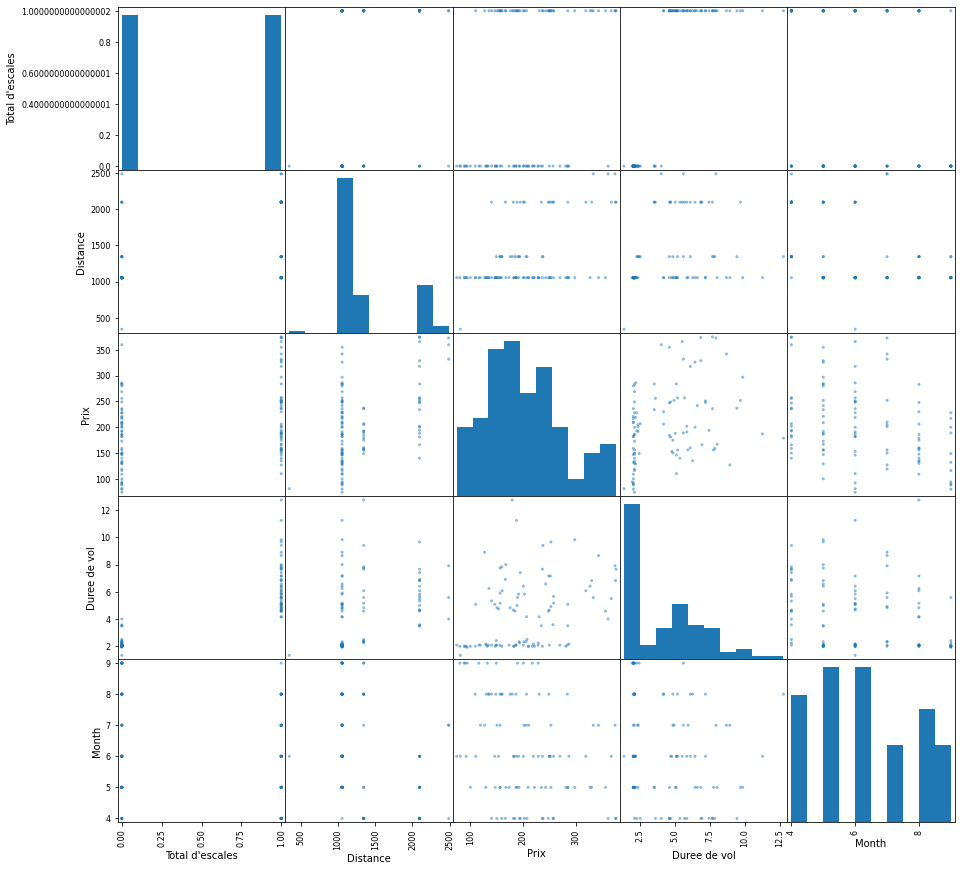

In [41]:

n = int(len(df)/5)
df1 = df.groupby("Destination").mean()["Prix"]
#df1.plot(kind = "bar")
df2 = df.groupby("Total d'escales").mean()["Prix"]
#df2.plot(kind = "bar")
df_cut = df.sort_values('Prix', ascending= False).iloc[n:]

ax = pd.plotting.scatter_matrix(df_cut.sample(100), figsize = (15, 15))
ax


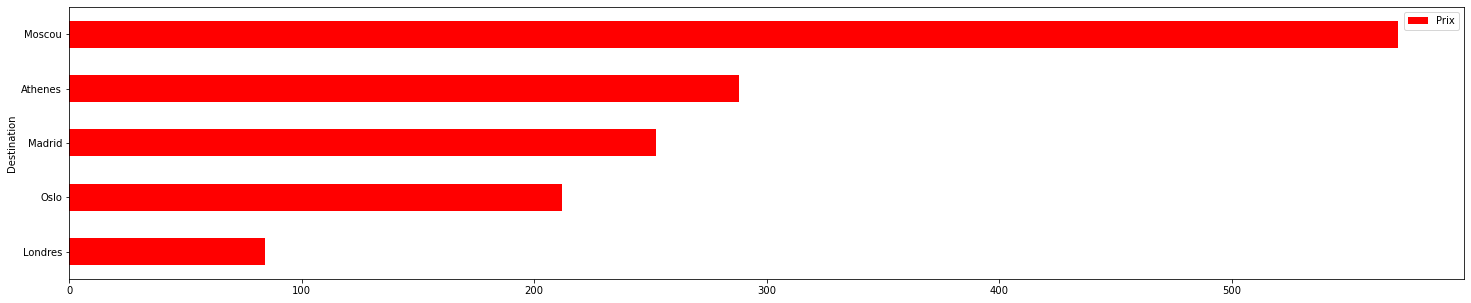

In [56]:
df1 = df.groupby('Destination').agg({'Prix' : "mean"}).sort_values('Prix', ascending = False).head(100)
p1 = df1.sort_values('Prix').plot(kind = "barh", figsize = (25,5), color = 'red')
plt.savefig('hist-price.png', bbox_inches = 'tight')

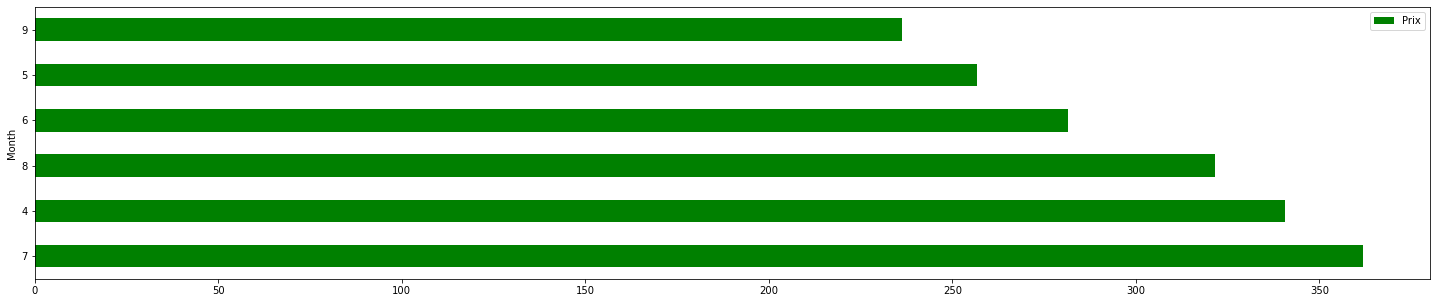

In [55]:
df2 = df.groupby('Month').agg({'Prix' : "mean"}).head(100)
p2 = df2.sort_values('Prix', ascending = False).plot(kind = "barh", figsize = (25,5), color = 'green')
plt.savefig('hist-price.png', bbox_inches = 'tight')